# Develop a process to plot the locations of the olive sided flycatcher and other auido clips in a filtered dataset.
https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3

In [1]:
# show path
import sys
sys.path.append('../../src/data/')
import clean_csv

In [2]:
import clean_csv
import pandas as pd
from pathlib import Path

### Step 1: load the cleaned dataframe from file

In [3]:
data_path = Path('../../data/')
df = pd.read_pickle(data_path / 'interim' / 'processed_metadata.pkl')
keep_cols = ['organization', 'project', 'project_id', 'location', 'location_id',
       'recording_date_time', 'recording_id', 'task_method', 'task_id',
       'aru_task_status', 'species_code', 'species_common_name',
       'species_scientific_name', 'species_class', 'detection_time',
       'task_duration', 'tag_duration', 'min_tag_freq', 'max_tag_freq',
       'tag_id', 'individual_order', 'vocalization', 'abundance', 'tag_rating',
       'tag_is_verified', 
       'verifier_id','media_url', 'clip_url', 'sensorId', 'tasks',
       'status', 'recording_url', 'file_type']
df = df[keep_cols]
df.tail()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,tag_rating,tag_is_verified,verifier_id,media_url,clip_url,sensorId,tasks,status,recording_url,file_type
1209410,BU,Zeller Woodpeckers- Time of Day,1241,Y-31-333-NE,43788,2017-05-03 05:36:00,480313,nan,442071,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac
1209413,BU,Zeller Woodpeckers- Time of Day,1241,Y-31-333-NE,43788,2017-05-03 05:36:00,480313,nan,442071,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac
1209414,BU,Zeller Woodpeckers- Time of Day,1241,Y-31-333-NE,43788,2017-05-03 05:36:00,480313,nan,442071,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac
1209417,BU,Zeller Woodpeckers- Time of Day,1241,Y-39-414-B2,43941,2016-05-15 05:51:00,480560,nan,442318,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac
1209424,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303,2018-06-17 06:05:00,480596,nan,442354,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac


In [4]:
df.location_id.value_counts()

location_id
98882     8409
32109     1239
58369      986
308712     691
457        667
          ... 
46305        1
46323        1
46324        1
46325        1
35185        1
Name: count, Length: 12871, dtype: int64

In [5]:
df.project_id.value_counts()[:10].sum()/df.project_id.value_counts().sum()

0.5520850748329977

In [6]:
df.project_id.unique().shape

(117,)

Out of 117 projects, the top 10 account for 55% of the clips in the database. 

<Axes: title={'center': 'Top 10 Projects whole database'}, xlabel='Project ID', ylabel='Number of clips'>

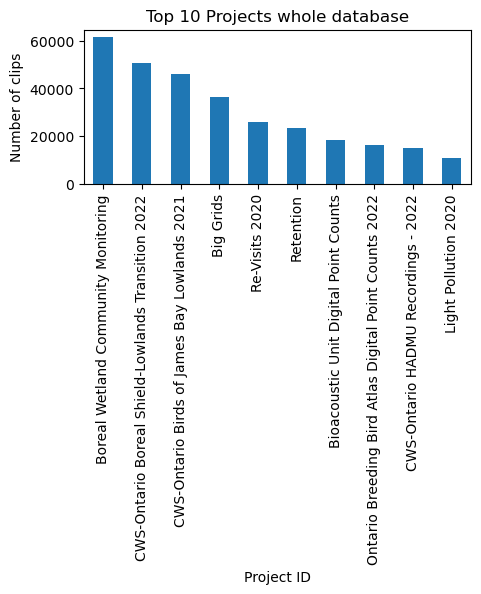

In [34]:
# plot the value counts of the top 10 projects.
# rotate the x ticks to be vertical
df.project.value_counts()[:10].plot(kind='bar', figsize=(5,2), rot=90, title='Top 10 Projects whole database', ylabel='Number of clips', xlabel='Project ID')

In [8]:
df.project_id.value_counts()

project_id
41      61573
1310    50790
885     45814
31      36430
390     25700
        ...  
779        14
681         9
815         7
105         2
1501        1
Name: count, Length: 117, dtype: int64

The 

### step 2: load the location data

In [9]:
# load the data from data_path/raw/locations.csv:

BU_location_data = pd.read_csv(data_path / 'raw' / 'BU_locations_202328.csv')
BU_location_data.loc[BU_location_data.internal_wildtrax_id == 43788]

,location,latitude,longitude,elevationMeters,bufferRadiusMeters,isHidden,trueCoordinates,comments,internal_wildtrax_id,internal_update_ts
16864,y-31-333-ne,55.90333,-110.557684,NaN,NaN,Visible,t,NaN,43788,2021-03-24 09:39:18


It looks as though the internal_wildtrax_id in BU_locations and the location_id in training data csv are the same.
Join the tables together so that each item in the dataset also gets a lat long. 

In [10]:

BU_location_data = BU_location_data[['latitude', 'longitude', 'internal_wildtrax_id']]

In [11]:
# join location_data with df so that df contains lat long coordinates
df = df.merge(BU_location_data, how='left', left_on='location_id', right_on='internal_wildtrax_id')


In [12]:
df.head(2)

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,media_url,clip_url,sensorId,tasks,status,recording_url,file_type,latitude,longitude,internal_wildtrax_id
0,BU,2023 Playback Experiment,2070,H23-CC-197-D1,483764,2023-06-02 15:51:51,829449,nan,813094,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,55.111081,-115.235705,483764.0
1,BU,2023 Playback Experiment,2070,H23-CC-197-D1,483764,2023-06-02 15:51:51,829449,nan,813094,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,55.111081,-115.235705,483764.0


<Axes: xlabel='longitude', ylabel='latitude'>

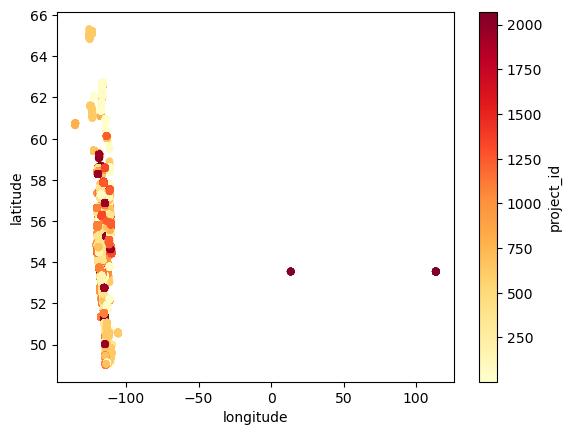

In [13]:
df.plot(x='longitude', y='latitude', kind='scatter', c='project_id', colormap='YlOrRd', )

In [14]:
len(df.loc[df.longitude == df.longitude.max()]), df.longitude.max()

(118, 113.4937)

118 samples are outliers whose longitude coordinate might be missing a minus sign. 

In [15]:
sum(df.longitude == -113.4937)

0

There aren't any other longitudes at -113.4937 though. Investigate further.

In [16]:
df.longitude.describe()

count    293672.000000
mean       -114.396540
std           5.628954
min        -135.166410
25%        -117.542010
50%        -113.481770
75%        -111.402096
max         113.493700
Name: longitude, dtype: float64

In [17]:
df.loc[df.longitude == 113.4937].head()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,media_url,clip_url,sensorId,tasks,status,recording_url,file_type,latitude,longitude,internal_wildtrax_id
336,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0
337,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0
338,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0
339,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0
340,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0


These anomalous locations come from the 2023 Playback Experiment project. 

Details from WildTrax: The purpose is to compare perceptibility and amplitude of several bird songs at varying distances given denser or open forests. The playback was completed during the bird breeding season in 2023 by the BU field crew across the province in a variety of forested conditions.
Each location has a maximum of three playbacks. The distance of the playback is added at the end of the location name, eg: BAM22-138-34m indicates the bird songs are played toward the ARU 34m away at site BAM22-138.

Given that these are playback experimetns, they should be dropped from the database during the cleaning process. 

In [18]:
# Drop the 2023 playback experiment from the dataframe
df.drop(df.loc[df.project_id == 2070].index, inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

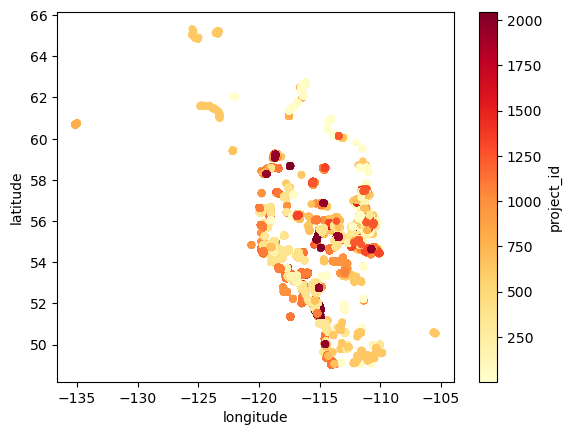

In [19]:
df.plot(x='longitude', y='latitude', kind='scatter', c='project_id',colormap='YlOrRd', )

Looks like it could be AB. Let's add a map. 

In [20]:
!conda install geopandas -y
import geopandas as gpd

Solving environment: done

# All requested packages already installed.



In [21]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_30922/1771207407.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

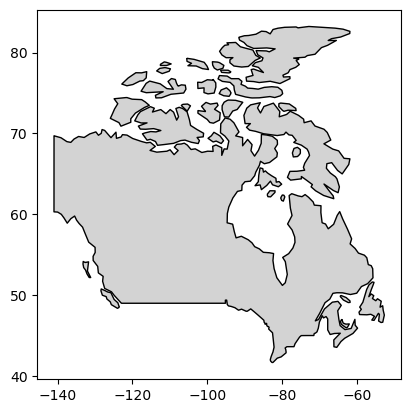

In [22]:
countries[countries.name=='Canada'].plot(color='lightgrey', edgecolor='black')

In [23]:
import matplotlib.pyplot as plt

def plot_locations(df, title = 'clip_locations'):
        # initialize an axis
        fig, ax = plt.subplots(figsize=(10,10))
        # plot map on axis
        countries = gpd.read_file(  
        gpd.datasets.get_path("naturalearth_lowres"))
        countries[countries["name"] == "Canada"].plot(color="lightgrey",ax=ax)
        # plot points
        df.plot(x="longitude", y="latitude", kind="scatter", 
         s=40, alpha=0.01, c="red",
                title=title, 
                ax=ax)
        # add grid
        ax.grid(alpha=0.5)
        plt.show()

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_30922/506395558.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


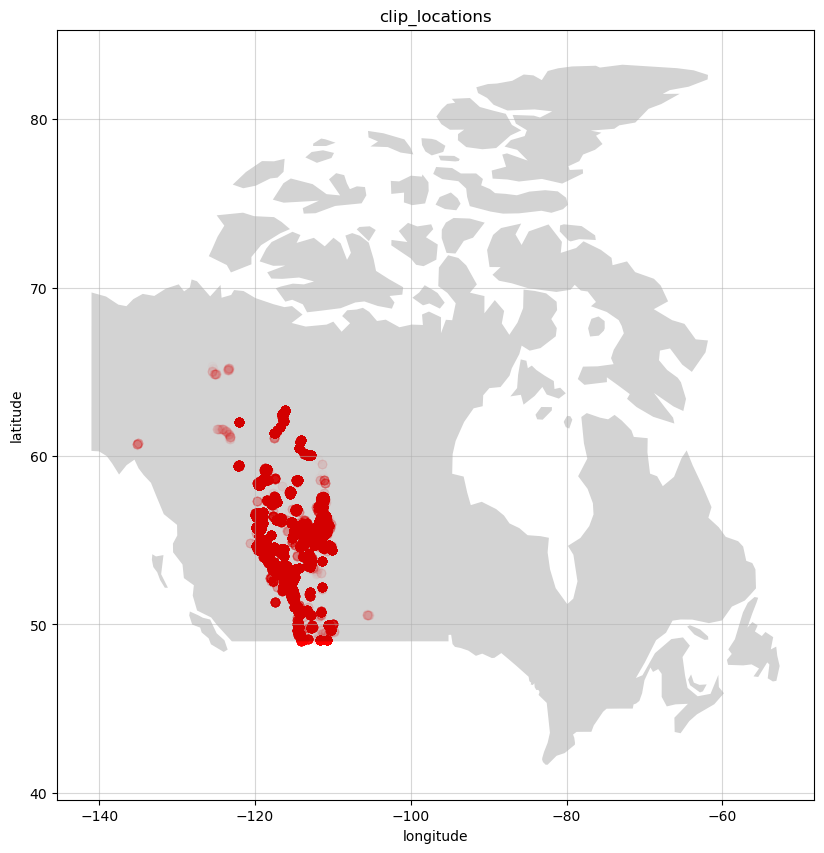

In [24]:
plot_locations(df)

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_30922/506395558.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


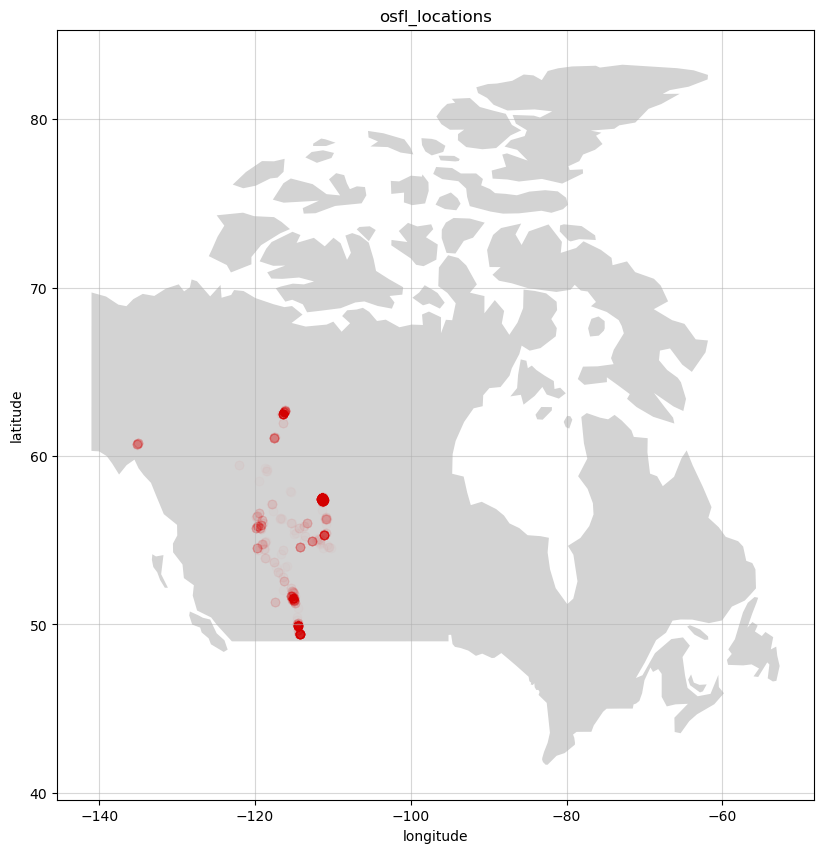

In [25]:
osfls  = df.loc[df.species_code == 'OSFL']
plot_locations(osfls, title='osfl_locations')

### Build a function to merge a dataframe and a locations.csv

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_30922/532566185.py:3: DtypeWarning: Columns (7,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(data_path/'raw/TrainingData_BU&Public_CWS_with_rec_links.csv')
/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_30922/506395558.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


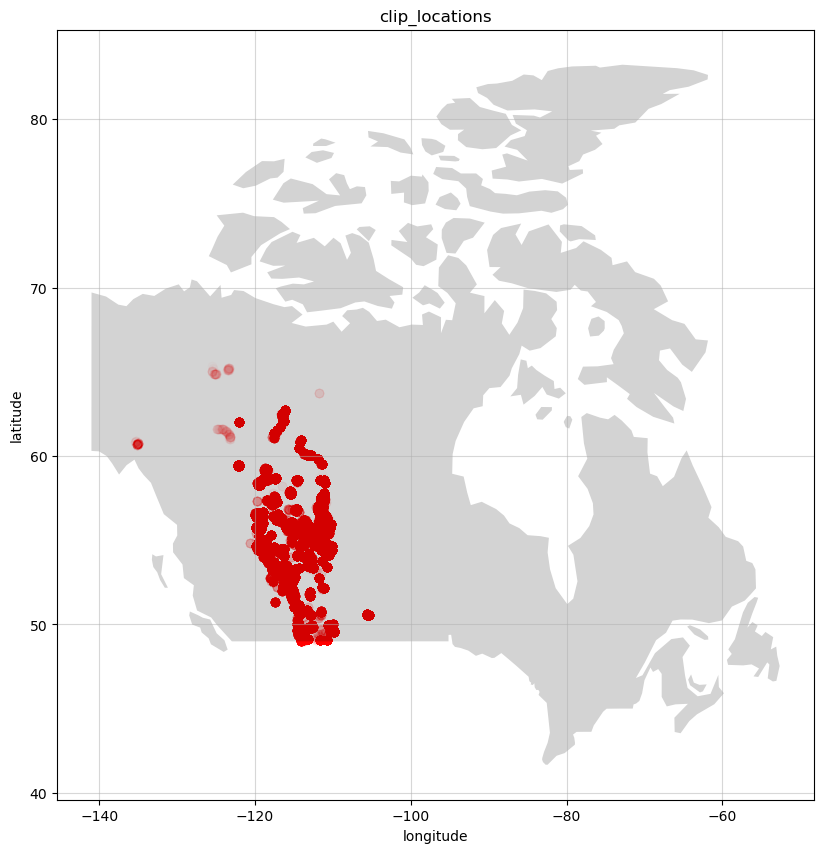

In [36]:
# The clip locations seen here are only for the filtered clips (dropped the TMTT clips and others). 
# What was the distribution in the original raw data?
df_raw = pd.read_csv(data_path/'raw/TrainingData_BU&Public_CWS_with_rec_links.csv')


def merge_locations(df: pd.DataFrame, locations: pd.DataFrame) -> pd.DataFrame:
    '''
    merges a locations.csv file from wildtrax with a pandas dataframe, then drops the redundant wildtrax id column.
    '''
    df = df.merge(locations, how='left', left_on='location_id', right_on='internal_wildtrax_id').drop(columns=['internal_wildtrax_id'])
    return df

df_raw = merge_locations(df_raw, BU_location_data)
df_raw.drop(df_raw.loc[df_raw.project_id == 2070].index, inplace=True)
plot_locations(df_raw)


### Only the location data from the BU projects are shown. The rest is absent because the location data for the other projects come from different locations.csv files. 

The locations.csv files for each of the projects which generated the largest number of birdcall clips , and the largest number of osfl clips (both printed above) were downloaded from wildtrax. 


Merge these locations.csv files into the dataframe so there are lat long coodinates for more of the samples

In [42]:
df.head()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,file_type,latitude_x,longitude_x,internal_wildtrax_id_x,latitude_y,longitude_y,internal_wildtrax_id_y,latitude,longitude,internal_wildtrax_id
0,BU,Alberta Archetypes,1501,P-E0-1-10,308678,2022-06-05 06:51:00,416962,nan,596169,Transcribed,...,flac,52.644040,-115.140510,308678.0,NaN,NaN,NaN,NaN,NaN,NaN
1,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,nan,87956,Transcribed,...,flac,54.607774,-110.681271,36043.0,NaN,NaN,NaN,NaN,NaN,NaN
2,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,nan,87898,Transcribed,...,flac,54.607774,-110.681271,36043.0,NaN,NaN,NaN,NaN,NaN,NaN
3,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,nan,87840,Transcribed,...,flac,54.607774,-110.681271,36043.0,NaN,NaN,NaN,NaN,NaN,NaN
4,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,nan,87927,Transcribed,...,flac,54.607774,-110.681271,36043.0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
df.columns

Index(['organization', 'project', 'project_id', 'location', 'location_id',
       'recording_date_time', 'recording_id', 'task_method', 'task_id',
       'aru_task_status', 'species_code', 'species_common_name',
       'species_scientific_name', 'species_class', 'detection_time',
       'task_duration', 'tag_duration', 'min_tag_freq', 'max_tag_freq',
       'tag_id', 'individual_order', 'vocalization', 'abundance', 'tag_rating',
       'tag_is_verified', 'verifier_id', 'media_url', 'clip_url', 'sensorId',
       'tasks', 'status', 'recording_url', 'file_type', 'latitude_x',
       'longitude_x', 'internal_wildtrax_id_x', 'latitude_y', 'longitude_y',
       'internal_wildtrax_id_y', 'latitude', 'longitude',
       'internal_wildtrax_id'],
      dtype='object')

In [46]:
# make a python list of files in a directory
import os
for project in os.listdir(data_path / 'raw' / 'locations'):
    print(project)



Bayne-OSFL-BU-AnyYr 2021_Locations_202341.csv
Lebeuf-Taylor - 2021 RETN_Locations_202341.csv
Ontario Breeding Bird Atlas Digital Point Counts 2022_Locations_202341.csv
Bioacoustic Unit Digital Point Counts_Locations_202341.csv
Lebeuf-Taylor - 2023 RETN_Locations_202341.csv
Big Grids_Locations_202341.csv
Re-Visits 2020_Locations_202341.csv
Retention_Locations_202341.csv
CWS-Ontario Birds of James Bay Lowlands 2021_Locations_202341.csv
CWS-Ontario Birds of James Bay Lowlands 2021 (Resample)_Locations_202341.csv
CWS-Ontario Boreal Shield-Lowlands Transition 2022_Locations_202340.csv
Light Pollution 2020_Locations_202341.csv
CWS-Ontario HADMU Recordings - 2022_Locations_202341.csv
Boreal Wetland Community Monitoring_Locations_202341.csv
Lebeuf-Taylor - BRCR, RCKI, OSFL, REVI, TEWA, YRWA - BU 2021_Locations_202341.csv


In [58]:
df.project_id.unique()

array([1501,  293, 1099,  791,  721,  787,  903,  623,  980,   32,   31,
        982,  161,   41, 1240,  959, 2019, 1313, 1272, 1475,  885, 1271,
       1512, 1511, 1449, 1310, 1651, 1423,  966, 1652,  965,  963, 1394,
        967, 1579,  990,  964,  599, 1123, 1230, 1235, 1234, 1069, 1109,
        145,  146,  147,  148,  141,  150,  151,  152,  153,  154,  282,
        662,  672, 1092,  387,  388, 1251, 1252, 1253,  334,  600,  620,
          5,   13,  178,  680,  657, 1984,  815, 1360, 1115, 2044,  679,
       1517,  137,  323,  596,  665,  668, 1328,   49,  290,  659, 1070,
        164,  687, 1317,  105,   16,  361,  390,   17,  619,  139, 1126,
       1088,  681,  807, 1333, 1946, 1949, 1950, 1951,  179,    2,  779,
        446,  285,  168,  828,  678, 1241])

# Todo: 
- build a better colour map for the legend. One with a different colour per sensible division of data, rather than sliding scale for project ID
- group the dataset by recording instead of clip. 
- load the cooridnate locations for the data from R instead of trying to download from the wildtrax website

